# StarCraft figure

In [1]:
%matplotlib inline

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

from kseval.utils import data_path
from kseval.plotting import sigconf_settings

In [3]:
sigconf_settings()

Sigconf settings loaded!


In [4]:
with open(data_path("fig/starcraft-wol.json")) as f:
    wol = json.load(f)
with open(data_path("fig/starcraft-hots.json")) as f:
    hots = json.load(f)

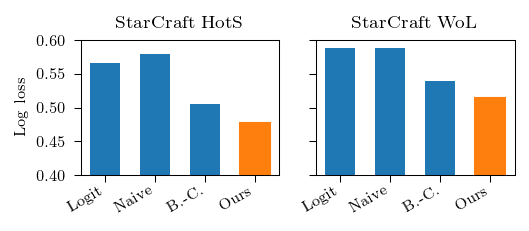

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(3.6, 1.6), sharey=True)
axs[0].set_ylim(ymin=0.4, ymax=0.6)
axs[0].set_ylabel("Log loss")

models = ["bt", "naive", "bc", "intransitive"]
labels = ["Logit", "Naive", "B.-C.", "Ours"]
idx = np.arange(len(models))
hl_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]

for ax, title, data in zip(axs, ("StarCraft HotS", "StarCraft WoL"), (hots, wol)):
    vals = [-data[m] for m in models]
    bars = ax.bar(idx, vals, width=0.6)
    bars[3].set_color(hl_color)
    ax.set_xticks(idx)
    ax.set_xticklabels(labels, rotation=30, ha="right", y=0.04)
    ax.set_title(title)
    
fig.tight_layout()
fig.savefig("starcraft.pdf", bbox_inches="tight")